**Lista 5**

In [8]:
import numpy as np
import matplotlib.pyplot as plt

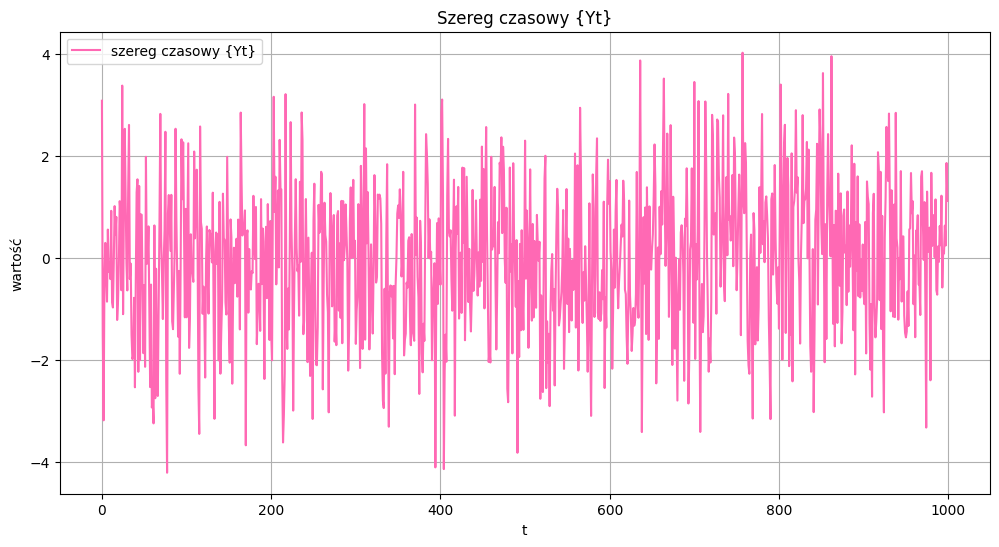

In [64]:
n = 1000  
phi = 0.5
sigma_Z = 1
sigma_W = 1

Zt = np.random.normal(0, sigma_Z, n)
Wt = np.random.normal(0, sigma_W, n)


Xt = Zt + phi * np.roll(Zt, 1)
Yt = Xt + Wt


plt.figure(figsize=(12, 6))
plt.plot(Yt, label="szereg czasowy {Yt}", color="hotpink")
plt.title("Szereg czasowy {Yt}")
plt.xlabel("t")
plt.ylabel("wartość")
plt.legend()
plt.grid()
plt.show()


In [65]:
def emp_ACVF(szereg, h):
    n = len(szereg)
    średnia = np.mean(szereg)
    return 1/n *(np.sum((szereg[:n-h] - średnia) * (szereg[h:] - średnia )))

In [70]:
def teo_ACVF(h):
    if h == 0:
        return sigma_Z*(1+phi**2) + sigma_W
    else:
        if h == 1:
            return sigma_Z*phi
        else:
            return 0 


In [67]:
hs = np.arange(20) 
emp_acvf = [emp_ACVF(Yt, h) for h in hs]

In [73]:
hs = np.arange(20) 
teo_acvf = [teo_ACVF(h) for h in hs]

In [74]:
print(teo_acvf)

[2.25, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


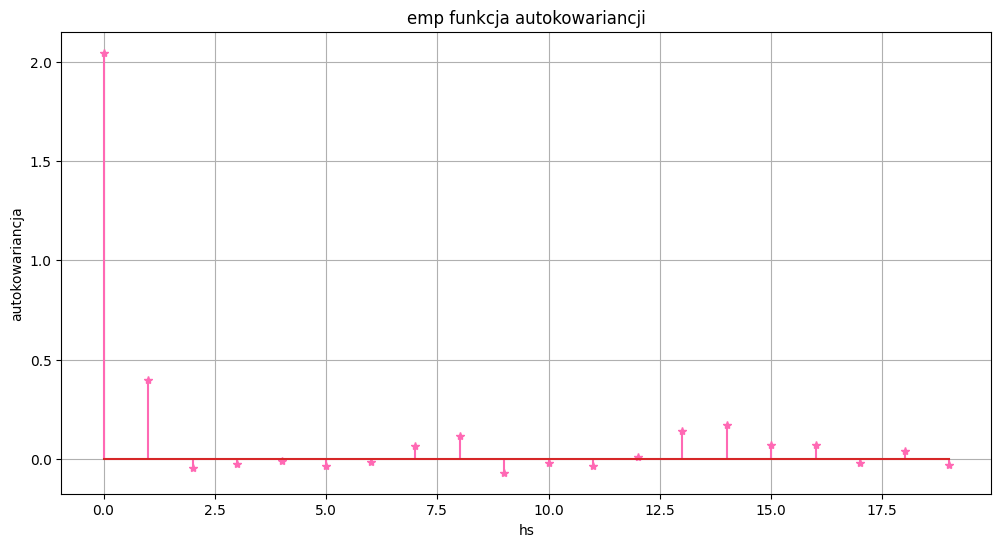

In [80]:
plt.figure(figsize=(12, 6))
plt.stem(hs, emp_acvf, linefmt ='hotpink', markerfmt ='*')
plt.title("emp funkcja autokowariancji")
plt.xlabel("hs")
plt.ylabel("autokowariancja")
plt.grid()
plt.show()

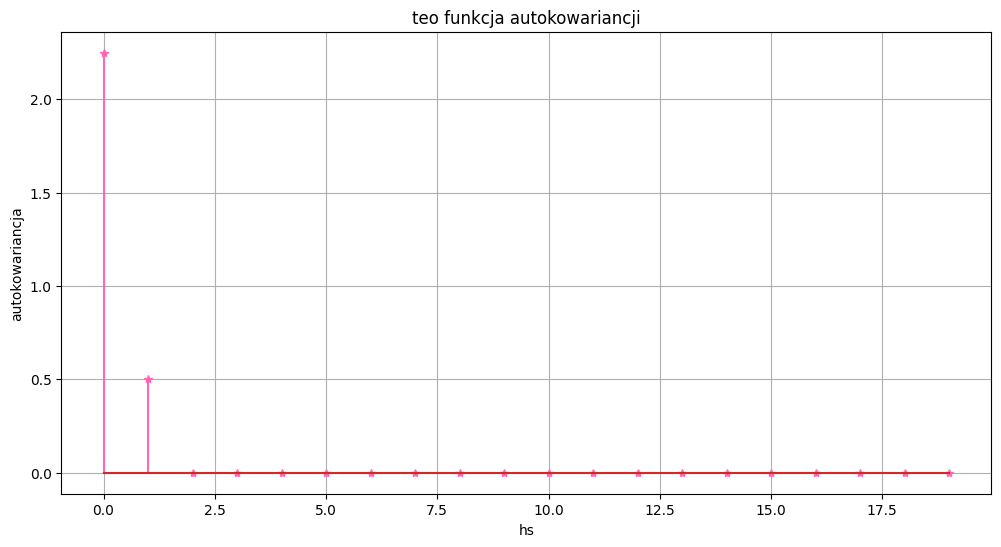

In [77]:
plt.figure(figsize=(12, 6))
plt.stem(hs, teo_acvf, linefmt ='hotpink', markerfmt ='*')
plt.title("teo funkcja autokowariancji")
plt.xlabel("hs")
plt.ylabel("autokowariancja")
plt.grid()
plt.show()

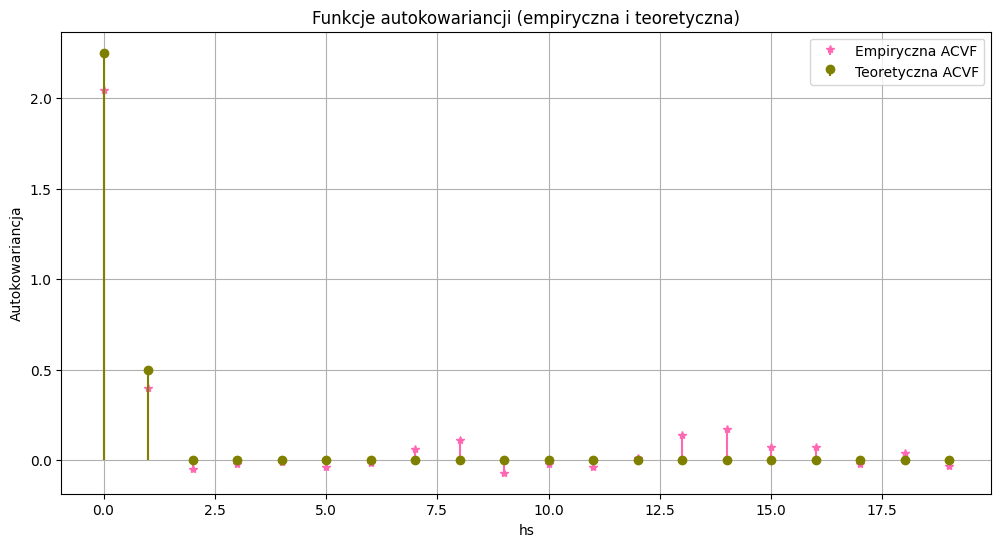

In [ ]:
plt.figure(figsize=(12, 6))
plt.stem(hs, emp_acvf, linefmt='hotpink', markerfmt='*', basefmt=" ", label='Empiryczna ACVF')
plt.stem(hs, teo_acvf, linefmt='olive', markerfmt='o', basefmt=" ", label='Teoretyczna ACVF')

plt.title("Funkcje autokowariancji (empiryczna i teoretyczna)")
plt.xlabel("hs")
plt.ylabel("Autokowariancja")
plt.legend()  
plt.grid()
plt.show()


**zadanie 4**

In [100]:
n= 1000
a = 0.1
b= 0.5
c= 5
d= 0.1
e=1
sigma= 1
theta= 0.5

In [101]:
#funkcja trendu
def m(t):
    return a*t+b

#funkcja sezonowości
def s(t):
    return c*np.sin(d*t+e)

In [102]:
Z = np.random.normal(0, sigma, n+1)
Y = Z[:-1] + theta * Z[1:]  

t = np.arange(1, n + 1) 
X = m(t) + s(t) + Y 

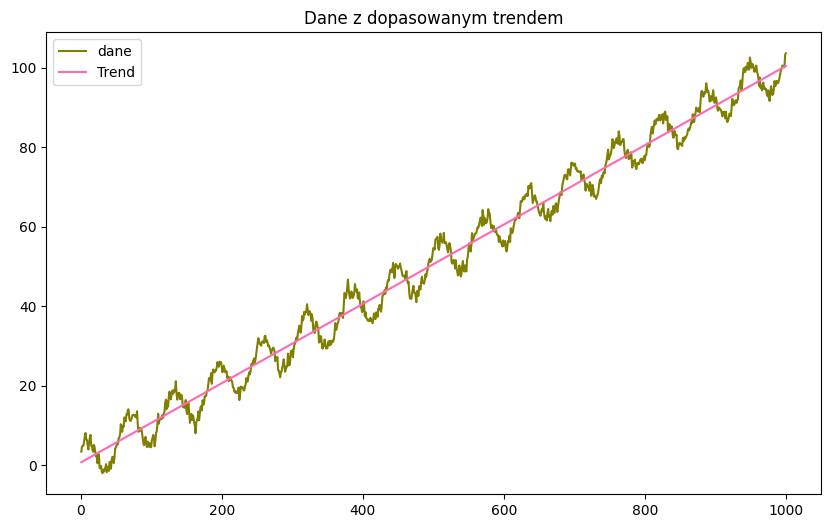

In [103]:
from numpy.polynomial.polynomial import Polynomial

trend1 = Polynomial.fit(t, X, 1)
m_hat = trend1(t)

plt.figure(figsize=(10,6))
plt.plot(t, X, label="dane",color="olive")
plt.plot(t, m_hat, label="Trend", color='hotpink')
plt.legend()
plt.title("Dane z dopasowanym trendem")
plt.show()


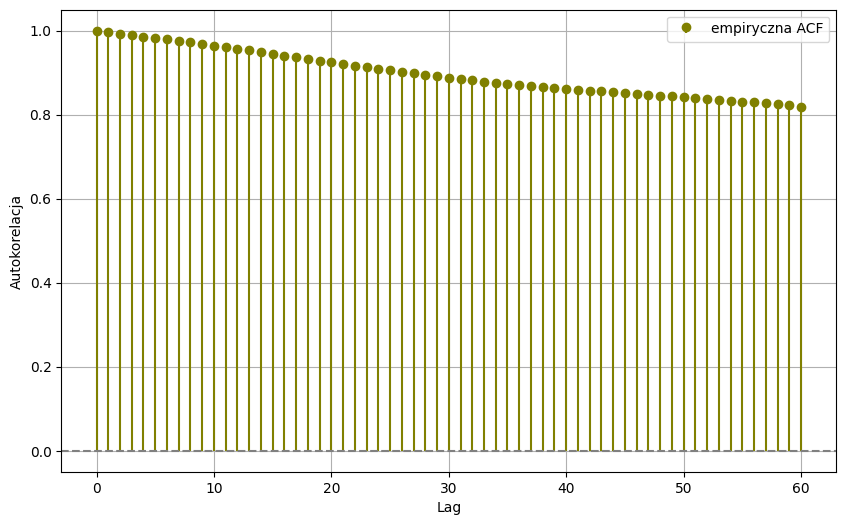

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

nlags = 60

def empACVF(X, h):
    n = len(X)
    x_mean = np.mean(X)
    return 1/n*sum((X[i]-x_mean)*(X[i+abs(h)]-x_mean) for i in range(1,n-abs(h)))

def empACF(X, h):
    return empACVF(X, h)/empACVF(X, 0)

empirical_acf1=[empACF(X, h) for h in range(nlags + 1)]



lags = np.arange(0, nlags + 1)

plt.figure(figsize=(10, 6))
plt.stem(lags, empirical_acf1, linefmt='olive', markerfmt='o', basefmt=" ", label='empiryczna ACF')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Lag")
plt.ylabel("Autokorelacja")
plt.legend()
plt.grid()
plt.show()



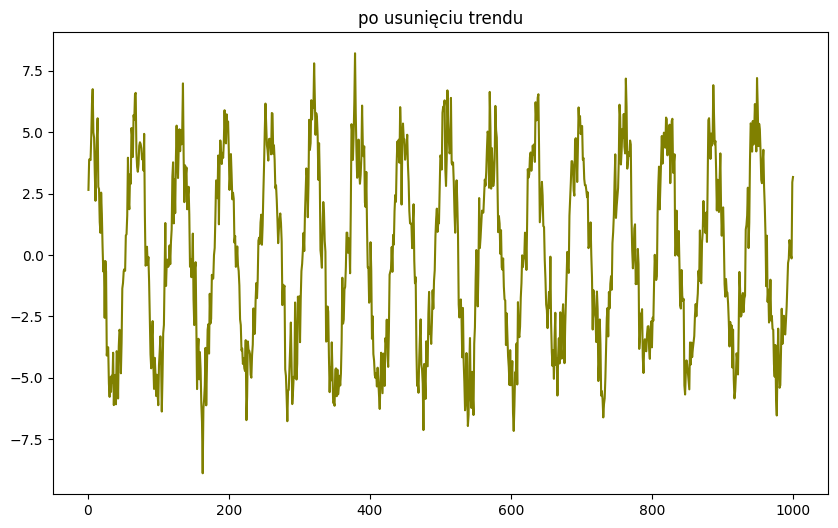

In [104]:
X_gwiazdka = X - m_hat

plt.figure(figsize=(10,6))
plt.plot(t, X_gwiazdka, color="olive")
plt.title("po usunięciu trendu")
plt.show()

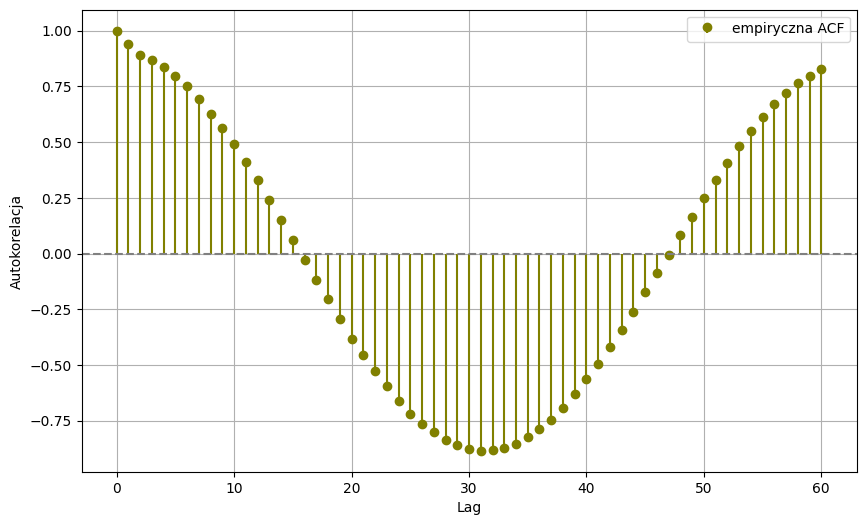

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

nlags = 60

def empACVF(X_gwiazdka, h):
    n = len(X_gwiazdka)
    x_mean = np.mean(X_gwiazdka)
    return 1/n*sum((X_gwiazdka[i]-x_mean)*(X_gwiazdka[i+abs(h)]-x_mean) for i in range(1,n-abs(h)))

def empACF(X_gwiazdka, h):
    return empACVF(X_gwiazdka, h)/empACVF(X_gwiazdka, 0)

empirical_acf1=[empACF(X_gwiazdka, h) for h in range(nlags + 1)]



lags = np.arange(0, nlags + 1)

plt.figure(figsize=(10, 6))
plt.stem(lags, empirical_acf1, linefmt='olive', markerfmt='o', basefmt=" ", label='empiryczna ACF')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Lag")
plt.ylabel("Autokorelacja")
plt.legend()
plt.grid()
plt.show()



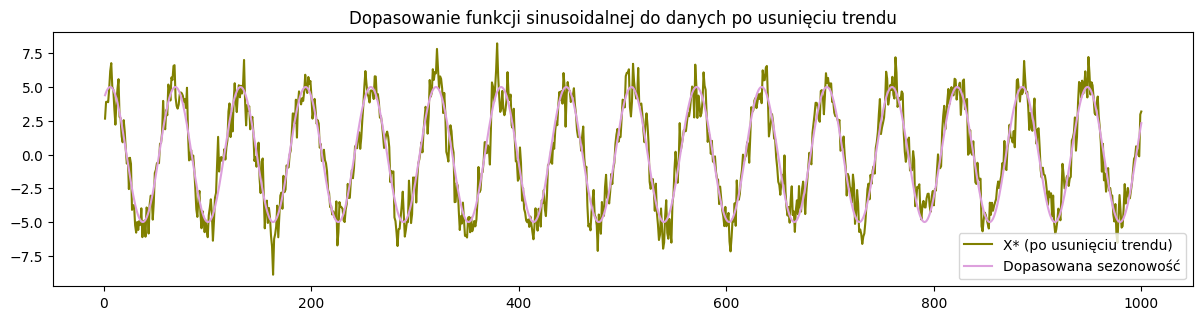

In [ ]:
from scipy.optimize import curve_fit

def sinusoidalna(t, A, B, C):
    return A * np.sin(B * t + C)
popt, pcov = curve_fit(sinusoidalna, t, X_gwiazdka, p0=[5, 0.1, 0.5])  
A_fit, B_fit, C_fit = popt
s_hat = sinusoidalna(t, A_fit, B_fit, C_fit)



plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, X_gwiazdka, label="X* (po usunięciu trendu)", color="olive")
plt.plot(t, s_hat, label="Dopasowana sezonowość", color="plum")
plt.legend()
plt.title("Dopasowanie funkcji sinusoidalnej do danych po usunięciu trendu")


plt.tight_layout()
plt.show()

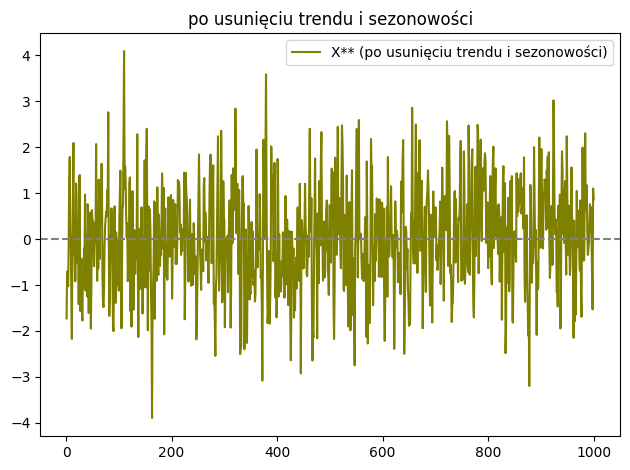

In [113]:
X_gwiazdka_gwiazdka = X_gwiazdka - s_hat

plt.plot(t, X_gwiazdka_gwiazdka, label="X** (po usunięciu trendu i sezonowości)", color="olive")
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.title("po usunięciu trendu i sezonowości")

plt.tight_layout()
plt.show()

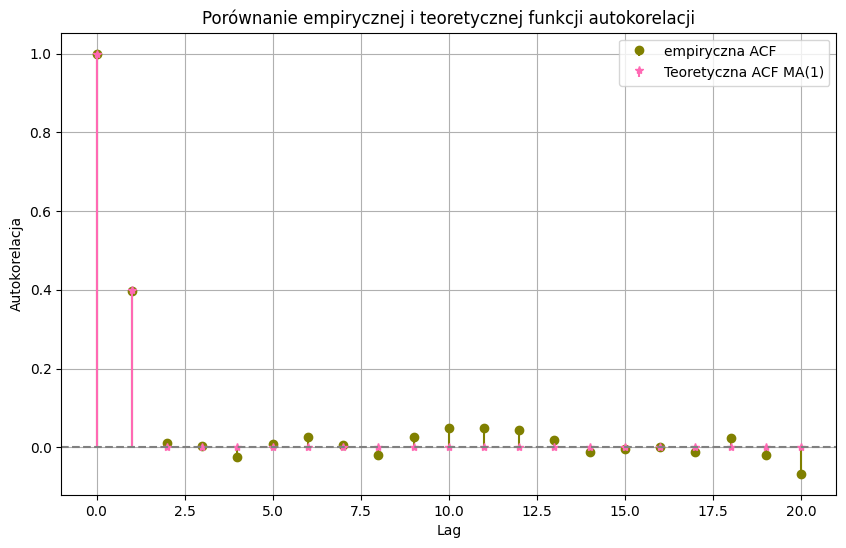

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

nlags = 20  

def empACVF(X_gwiazdka_gwiazdka, h):
    n = len(X_gwiazdka_gwiazdka)
    x_mean = np.mean(X_gwiazdka_gwiazdka)
    return 1/n*sum((X_gwiazdka_gwiazdka[i]-x_mean)*(X_gwiazdka_gwiazdka[i+abs(h)]-x_mean) for i in range(1,n-abs(h)))

def empACF(X_gwiazdka_gwiazdka, h):
    return empACVF(X_gwiazdka_gwiazdka, h)/empACVF(X_gwiazdka_gwiazdka, 0)

empirical_acf1=[empACF(X_gwiazdka_gwiazdka, h) for h in range(nlags + 1)]

def MA1teoACF(h, theta):
    if h == 0:
        return 1
    if abs(h) == 1:
        return theta/(1+theta**2)
    else:
        return 0

theoretical_acf = [MA1teoACF(h, theta) for h in range(nlags + 1)]

lags = np.arange(0, nlags + 1)

plt.figure(figsize=(10, 6))
plt.stem(lags, empirical_acf1, linefmt='olive', markerfmt='o', basefmt=" ", label='empiryczna ACF')
plt.stem(lags, theoretical_acf, linefmt='hotpink', markerfmt="*", basefmt=" ", label="Teoretyczna ACF MA(1)")
plt.axhline(0, color='gray', linestyle='--')
plt.title("Porównanie empirycznej i teoretycznej funkcji autokorelacji")
plt.xlabel("Lag")
plt.ylabel("Autokorelacja")
plt.legend()
plt.grid()
plt.show()

